Відрізок 1:
S_0(x) = 1.83 + 2.3786(x - 0.5) + 0.0(x - 0.5)^2 + -20.7146(x - 0.5)^3, x належить [0.5, 0.7]
Відрізок 2:
S_1(x) = 2.14 + -0.1072(x - 0.7) + -12.4288(x - 0.7)^2 + 17.4348(x - 0.7)^3, x належить [0.7, 1.0]
Відрізок 3:
S_2(x) = 1.46 + -2.857(x - 1.0) + 3.2626(x - 1.0)^2 + 4.8563(x - 1.0)^3, x належить [1.0, 1.4]
Відрізок 4:
S_3(x) = 1.15 + 1.23(x - 1.4) + 9.0901(x - 1.4)^2 + 6.0601(x - 1.4)^3, x належить [1.4, 1.9]
Значення сплайна:
x = 0.50, y = 1.830
x = 0.51, y = 1.890
x = 0.53, y = 1.943
x = 0.54, y = 1.990
x = 0.56, y = 2.030
x = 0.57, y = 2.064
x = 0.58, y = 2.093
x = 0.60, y = 2.116
x = 0.61, y = 2.134
x = 0.63, y = 2.146
x = 0.64, y = 2.154
x = 0.66, y = 2.157
x = 0.67, y = 2.156
x = 0.68, y = 2.151
x = 0.70, y = 2.142
x = 0.71, y = 2.129
x = 0.73, y = 2.113
x = 0.74, y = 2.093
x = 0.75, y = 2.071
x = 0.77, y = 2.046
x = 0.78, y = 2.018
x = 0.80, y = 1.989
x = 0.81, y = 1.957
x = 0.83, y = 1.923
x = 0.84, y = 1.888
x = 0.85, y = 1.852
x = 0.87, y = 1.815
x = 0.88, y =

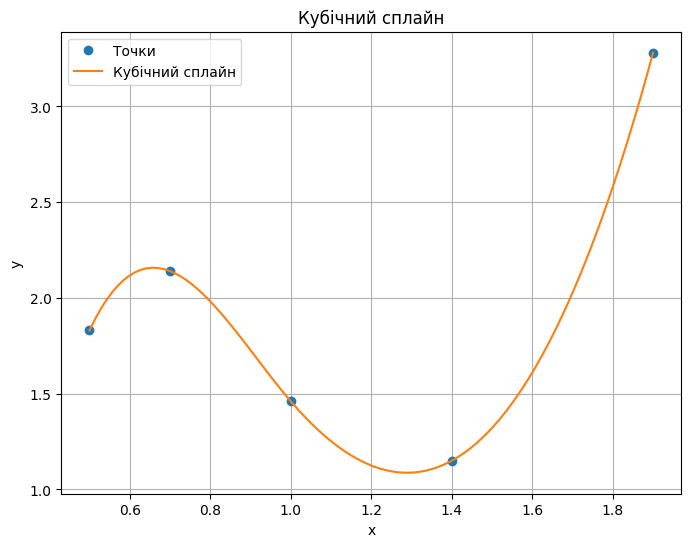

In [2]:
import numpy as np 
from scipy.interpolate import CubicSpline 
import matplotlib.pyplot as plt 
x = np.array([0.5, 0.7, 1 , 1.4, 1.9]) 
y = np.array([1.83 ,2.14,1.46,1.15,3.28]) 
n = len(x) - 1 
h = np.diff(x) 
a = y 
b = np.zeros(n) 
d = np.zeros(n) 
c = np.zeros(n) 
alpha = np.zeros(n) 
for i in range(1, n): 
    alpha[i] = (3 / h[i]) * (a[i+1] - a[i]) - (3 / h[i-1]) * (a[i] - a[i-1]) 
l = np.ones(n) 
mu = np.zeros(n) 
z = np.zeros(n) 
for i in range(1, n): 
    l[i] = 2 * (x[i+1] - x[i-1]) - h[i-1] * mu[i-1] 
    mu[i] = h[i] / l[i] 
    z[i] = (alpha[i] - h[i-1] * z[i-1]) / l[i] 
c[n-1] = (alpha[n-1] - h[n-2] * z[n-2]) / (2 * (h[n-2] + mu[n-1])) 
b[n-1] = (a[n] - a[n-1]) / h[n-1] - h[n-1] * (2 * c[n-1] + c[n-2]) / 3 
d[n-1] = (c[n-1] - c[n-2]) / (3 * h[n-1]) 
for j in range(n - 2, -1, -1): 
    c[j] = z[j] - mu[j] * c[j+1] 
    b[j] = (a[j+1] - a[j]) / h[j] - h[j] * (c[j+1] + 2 * c[j]) / 3 
    d[j] = (c[j+1] - c[j]) / (3 * h[j]) 
for i in range(n): 
    print(f"Відрізок {i+1}:") 
    print(f"S_{i}(x) = {a[i]} + {b[i].round(4)}(x - {x[i]}) + {c[i].round(4)}(x - {x[i]})^2 + {d[i].round(4)}(x - {x[i]})^3, x належить [{x[i]}, {x[i+1]}]") 
cs = CubicSpline(x, y) 
x_new = np.linspace(np.min(x), np.max(x), 100) 
y_new = cs(x_new) 
print("Значення сплайна:") 
for i in range(len(x_new)): 
 print(f"x = {x_new[i]:.2f}, y = {y_new[i]:.3f}") 
plt.figure(figsize=(8, 6)) 
plt.plot(x, y, 'o', label='Точки') 
plt.plot(x_new, y_new, label='Кубічний сплайн') 
plt.xlabel('x') 
plt.ylabel('y') 
plt.title('Кубічний сплайн') 
plt.legend() 
plt.grid(True) 
plt.show()
